In [1]:
from pyvalet import ValetInterpreter
vi = ValetInterpreter()

In [19]:
#Determine whether to fetch data 
check_avail =1 
if check_avail:
    df = vi.list_series()
    df.to_csv('data_avail.csv')
    df_groups = vi.list_groups()
    df_groups.to_csv('data_groups.csv')

In [17]:
df_groups = vi.list_groups()
print(df_groups)

                     name                                              label  \
0              sdp-2012-8                      Staff Discussion Paper 2012-8   
1             swp-2012-37                        Staff Working Paper 2012-37   
2             swp-2015-46                        Staff Working Paper 2015-46   
3             swp-2013-42                        Staff Working Paper 2013-42   
4              sdp-2014-3                      Staff Discussion Paper 2014-3   
...                   ...                                                ...   
1147  SAN_GUIL20210923_C1  The announcement of the GBPP had a strong and ...   
1148  SAN_GUIL20210923_C2  Overnight index swap rates were close to 25 ba...   
1149  SAN_GUIL20210923_C3  At announcement, yields of Government of Canad...   
1150  SAN_GUIL20210923_C4  QE operations caused a drop in Government of C...   
1151  SAN_GUIL20210923_C5  The flow effect almost reversed four days foll...   

                                       

Index(['\r\ndate"', 'CES_C1_SHORT_TERM', 'CES_C1_MID_TERM', 'CES_C1_LONG_TERM',
       'CES_C1_PERCEPTIONS', 'CES_C2_ST_N6', 'CES_C2_ST_N6_N5',
       'CES_C2_ST_N5_N4', 'CES_C2_ST_N4_N3', 'CES_C2_ST_N3_N2',
       ...
       'CES_C6_TWO_YEAR', 'CES_C6_FIVE_YEAR', 'CES_C7_QC', 'CES_C7_ON',
       'CES_C7_MB', 'CES_C7_SK', 'CES_C7_AB', 'CES_C7_BC', 'CES_C7_AT',
       'CES_C7_CANADA'],
      dtype='object', length=136)


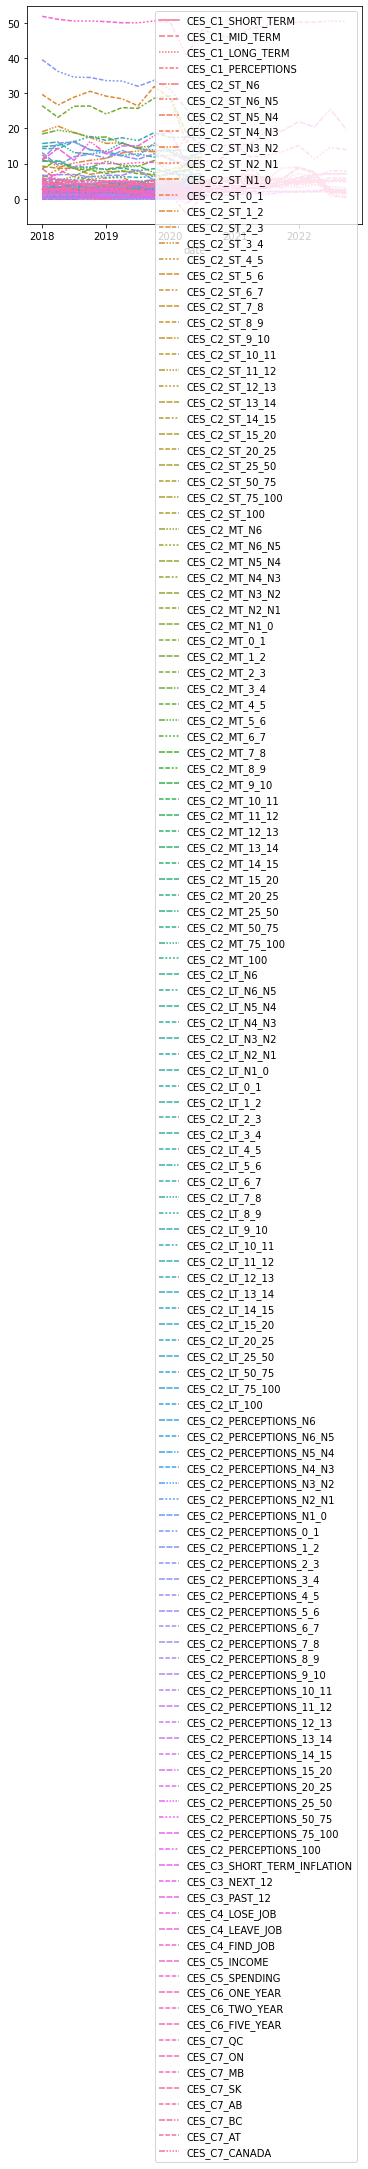

In [7]:
from matplotlib import pyplot as plt 
import pandas as pd
import seaborn as sns 
from datetime import timedelta, date

listplot = {'CSCE'}

for set in listplot:
    df = vi.get_group_observations(set, response_format='csv')
    df['date'] = pd.to_datetime(df['\r\ndate"'])
    df.set_index('date',inplace=True)
    with sns.color_palette("deep"):
        end_date_plot = df.index.max()
        start_date_plot = end_date_plot - timedelta(days = (365*5))
        df_plot = df.loc[start_date_plot:end_date_plot]
        sns.lineplot(data=df_plot)

print(df.columns)

In [60]:

df_series = vi.get_series_observations("CDN.AVG.5YTO10Y.AVG", response_format='csv')

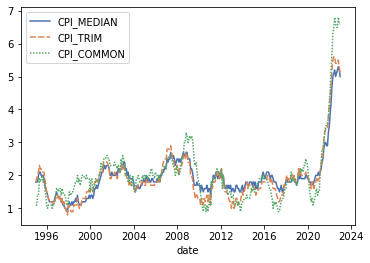

In [49]:

with sns.color_palette("deep"):
    #fig, axes = plt.subplots(3, figsize=(14, 6))
    # 1. Plot the original dataset, for 2000-01 through 2020-01
    #df_CPI.loc[start:end].plot(ax=axes[0])
    sns.lineplot(data=df_CPI[['CPI_MEDIAN','CPI_TRIM','CPI_COMMON']])





### For each simple graph, the following is required:
* The time span (quoted as years into the past)
* The database
* the series to plot
* the required transformations
* the plot style

**Goal is to define a function that takes a dictionary of these inputs, and will output charts**
* What is the best way to store data like that?
* what is the most readable way to set it up
* will this framework allow for customization?
